In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('psu_csv.csv')

In [6]:
sns.set_style('whitegrid')

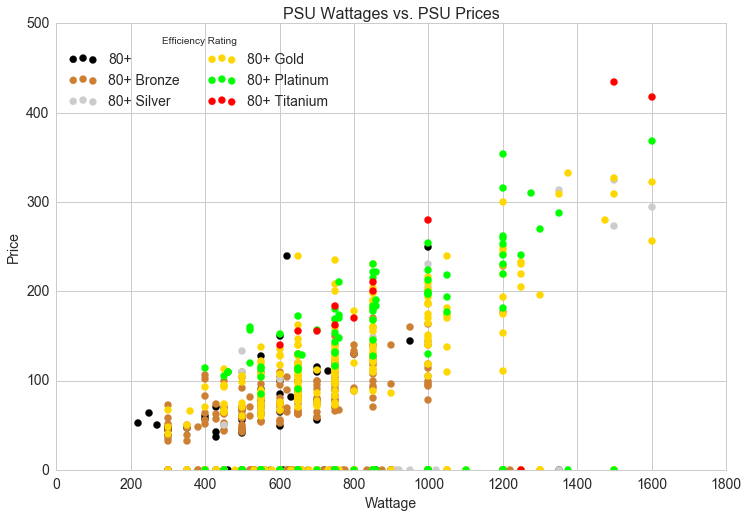

In [7]:
plt.figure(figsize=(12,8))
plt.axis([0,1800,0,500])
plt.title('PSU Wattages vs. PSU Prices', fontsize=16)
plt.xlabel('Wattage', fontsize=14)
plt.ylabel('Price', fontsize=14)
#colors = ['black', 'bronze', 'silver', 'gold', 'green', 'red']
colors = ['#000000', '#cd7f32', '#CCCCCC', '#ffd700', '#00ff00', '#ff0000']

ef1 = plt.scatter(df[df.eff_rank==1].power, df[df.eff_rank==1].avg, color = colors[0], s=50)
ef2 = plt.scatter(df[df.eff_rank==2].power, df[df.eff_rank==2].avg, color = colors[1], s=50)
ef3 = plt.scatter(df[df.eff_rank==3].power, df[df.eff_rank==3].avg, color = colors[2], s=50)
ef4 = plt.scatter(df[df.eff_rank==4].power, df[df.eff_rank==4].avg, color = colors[3], s=50)
ef5 = plt.scatter(df[df.eff_rank==5].power, df[df.eff_rank==5].avg, color = colors[4], s=50)
ef6 = plt.scatter(df[df.eff_rank==6].power, df[df.eff_rank==6].avg, color = colors[5], s=50)

plt.legend((ef1, ef2, ef3, ef4, ef5, ef6),
           ('80+', '80+ Bronze', '80+ Silver', '80+ Gold', '80+ Platinum', '80+ Titanium'),
           title = 'Efficiency Rating',
           scatterpoints=3,
           loc='upper left',
           ncol=2,
           fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/psu/watts_vs_price.png'))

In [8]:
#map categorical values to integers
type_mapping = {x:y for x,y in zip(df.Type.unique(),range(len(df.Type.unique())))}
df['Type_int'] = df.Type.map(type_mapping)

modular_mapping = {x:y for x,y in zip(df.Modular.unique(),range(len(df.Modular.unique())))}
df['Modular_int'] = df.Modular.map(modular_mapping)

manufacturer_mapping = {x:y for x,y in zip(df.Manufacturer.unique(),range(len(df.Manufacturer.unique())))}
df['Manufacturer_int'] = df.Manufacturer.map(manufacturer_mapping)

In [9]:
#drop NaN values, seperate X and y
cols = [u'power', u'eff_rank', u'ppw', u'Manufacturer_int', u'Modular_int', u'Type_int', u'avg']
feature_cols = [u'power', u'eff_rank', u'Manufacturer_int', u'Modular_int', u'Type_int']
df1 = df[df.avg>0]
X = df1[cols].dropna()[feature_cols]
y = df1[cols].dropna().avg

In [10]:
from sklearn.ensemble import RandomForestRegressor
# max_features=8 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=80, max_features=4, oob_score=True, random_state=544)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=80, n_jobs=1, oob_score=True, random_state=544,
           verbose=0, warm_start=False)

In [11]:
feature_importance = pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)

In [12]:
feature_importance

,feature,importance
0,power,0.674090
1,eff_rank,0.170238
2,Manufacturer_int,0.101809
3,Modular_int,0.033512
4,Type_int,0.020352


In [22]:
rfreg.predict(df.ix[1260][feature_cols])

/Users/andrewcaffey/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 278.09580179])

In [23]:
df[(df['Efficiency Certification']=='80+ Titanium')&(df.power>1200)&(df.avg==0)]['Part #']

1260    PS-TPG-1250DPCTXX-T
Name: Part #, dtype: object

In [20]:
rfreg.predict(X_)

array([ 278.09580179])

In [24]:
349.99-278.09

71.90000000000003

In [43]:
np.array(df.ix[1260][feature_cols])

array([1250.0, 6.0, 18, 1, 2], dtype=object)

In [44]:
rfreg.predict(np.array(df.ix[1260][feature_cols]))

array([ 278.09580179])

In [48]:
df1 = df[df.avg>0]
eff = df[df['Efficiency Certification'].notnull()]
eff = eff['Efficiency Certification']
dummies = pd.get_dummies(eff)
dummies.drop('80+', axis=1, inplace=True)
df2 = df1.join(dummies)
eff_cols = [x for x in df2.columns if '80+' in x]
feature_cols = eff_cols + ['power']
cols = feature_cols + ['avg']
X = df2[cols].dropna()[feature_cols]
y = df2[cols].dropna().avg

In [25]:
df4 = df[(df.avg>0)&(df['Efficiency Certification']=='80+ Titanium')]
X = df4[['power']]
y = df4[['avg']]

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print reg.predict([1250])

[[ 332.5585859]]


/Users/andrewcaffey/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [27]:
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

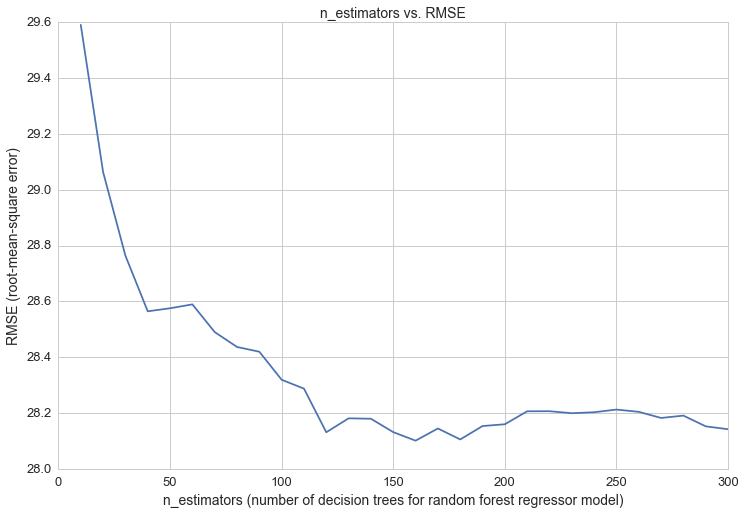

In [60]:
plt.figure(figsize=(12,8))
plt.plot(estimator_range, RMSE_scores)
plt.title('n_estimators vs. RMSE', fontsize=14)
plt.xlabel('n_estimators (number of decision trees for random forest regressor model)', fontsize=14)
plt.ylabel('RMSE (root-mean-square error)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/psu/n_est_vs_rmse.png'))

In [24]:
sorted(zip(RMSE_scores, estimator_range))[0]

(28.100834969072217, 160)

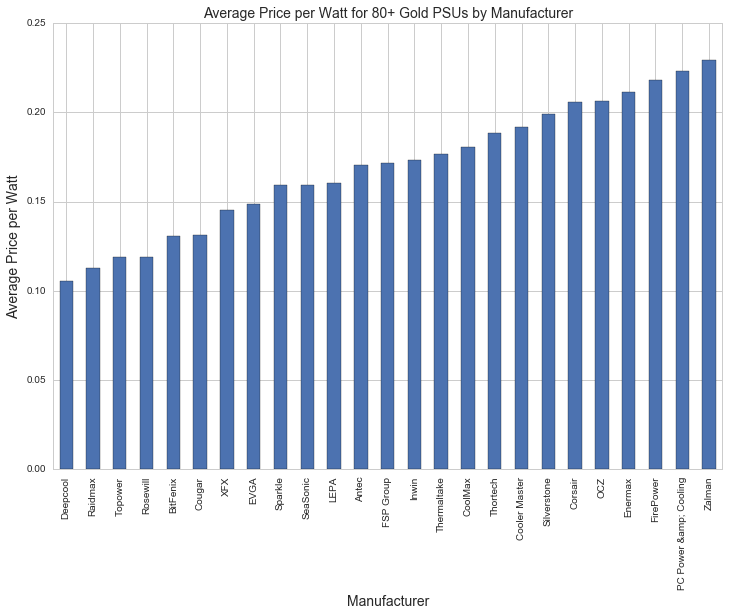

In [64]:
sns.plt.figure(figsize=(12,8))
plt.title('Average Price per Watt for 80+ Gold PSUs by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Average Price per Watt', fontsize=14)
df[(df['Efficiency Certification']=='80+ Gold')&(df.power>0)&(df.avg>0)].groupby('Manufacturer').ppw.mean().sort_values().plot(kind='bar')
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/psu/average_price_by_manufacturer.png'))

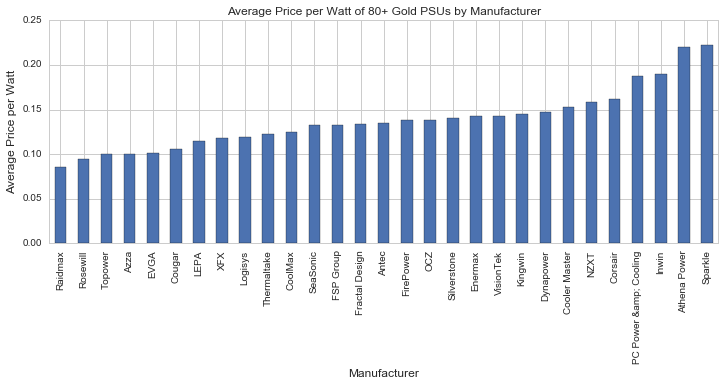

In [15]:
#Which manufacturer has the most expensive power supply units by $/W for 80+ Bronze 
sns.plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
plt.title('Average Price per Watt of 80+ Gold PSUs by Manufacturer', fontsize=12)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Average Price per Watt', fontsize=12)
df[(df['Efficiency Certification']=='80+ Bronze')&(df.power>0)&(df.avg>0)].groupby('Manufacturer').ppw.mean().sort_values().plot(kind='bar')

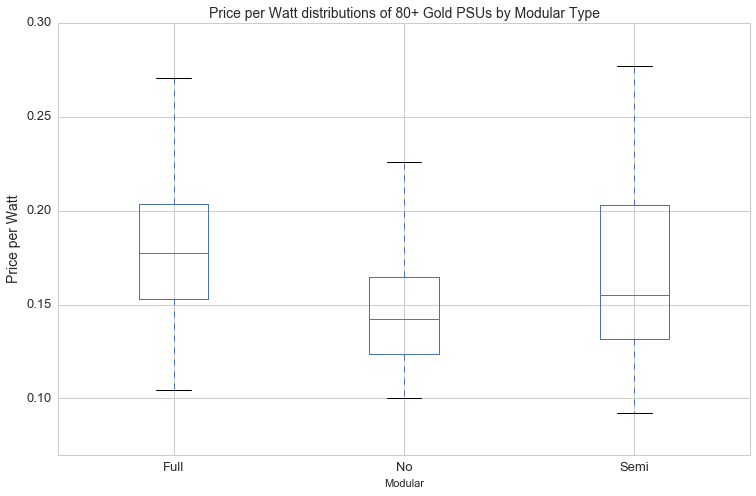

In [66]:
df[(df['Efficiency Certification']=='80+ Gold')&(df.avg>0)].boxplot(column='ppw', by='Modular', figsize=(12,8))
plt.ylim([0.07,0.3])
plt.suptitle('')
plt.ylabel('Price per Watt', fontsize=14)
plt.title('Price per Watt distributions of 80+ Gold PSUs by Modular Type', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/psu/price_by_modular.png'))

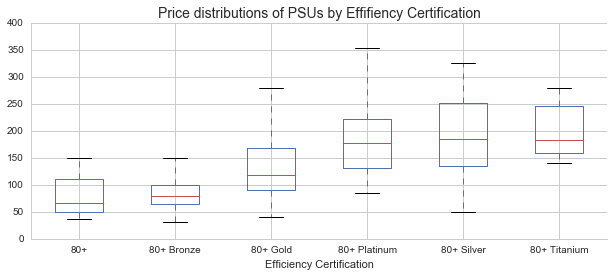

In [34]:
sns.set_style("whitegrid")
df[df.avg>0].boxplot(column='avg', by='Efficiency Certification', figsize=(10,4))
plt.ylim([0.0,400])
plt.suptitle('')
sns.despine()
plt.title('Price distributions of PSUs by Effifiency Certification', fontsize=14)

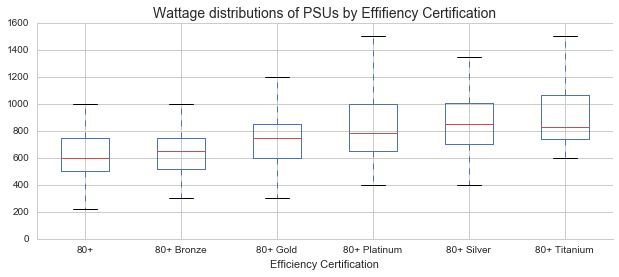

In [64]:
sns.set_style("whitegrid")
df[df.power>0].boxplot(column='power', by='Efficiency Certification', figsize=(10,4))
plt.ylim([0.0,1600])
plt.suptitle('')
sns.despine()
plt.title('Wattage distributions of PSUs by Effifiency Certification', fontsize=14)

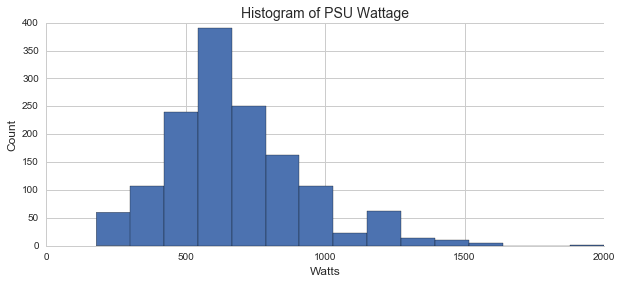

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.hist(df[df.power>0].power, bins=15)
plt.ylim([0.0,400])
plt.xlabel('Watts', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.despine()
plt.title('Histogram of PSU Wattage', fontsize=14)

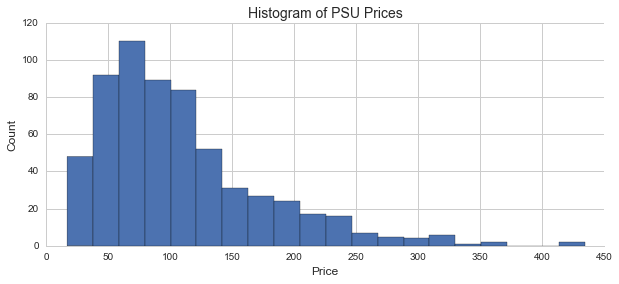

In [72]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.hist(df[df.avg>0].avg, bins=20)
plt.ylim([0.0,120])
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.despine()
plt.title('Histogram of PSU Prices', fontsize=14)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average MSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

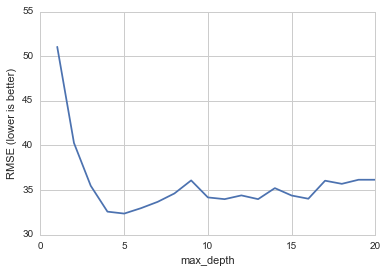

In [26]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [27]:
sorted(zip(RMSE_scores, max_depth_range))[0]

(32.371944331578405, 5)